In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Movie Rating Prediction - Regression Models

Kita akan mencoba membandingkan performa dari beberapa regression models pada library sklearn.
Performa model akan dievaluasi dengan menggunakan K-fold cross validation.
Metric yang dipakai adalah RMSE (Root Mean Squared Error).

## Load Preprocessed Data

In [30]:
feature = np.loadtxt('files/rating-processed.csv')
target = np.loadtxt('files/rating-processed-target.csv')

print feature.shape
print target.shape

(5043, 7)
(5043,)


## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression


linear_reg = LinearRegression()
print linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


## Ridge Regression

In [32]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
print ridge_reg

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


## Lasso Regression

In [33]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
print lasso_reg

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


## Bayesian Ridge Regression

In [34]:
from sklearn.linear_model import BayesianRidge


bayesian_ridge_reg = BayesianRidge()
print bayesian_ridge_reg

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)


## K-Nearest Neighbor Regression

In [35]:
from sklearn.neighbors import KNeighborsRegressor


kn_reg = KNeighborsRegressor()
print kn_reg

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')


## Random Forest Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor


rf_reg = RandomForestRegressor()
print rf_reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


## Evaluation

RMSE adalah salah satu metric yang sering digunakan dalam kasus regresi.
RMSE menghitung akar rata-rata kuadrat error antara nilai prediksi dan nilai target.
Konsekuensinya, RMSE ini nilainya sensitif terhadap outlier.
Semakin besar nilai errornya (prediction - target) maka akan diberikan bobot yang semakin besar pula.
Selain RMSE, beberapa alternatif lain yaitu: Mean Squared Error (MSE), Mean Absolute Error (MAE), atau R2 score.

Kita akan mencoba dua teknik evaluasi, pertama dengan membagi data menjadi dua set (training dan testing) kemudian menghitung RMSE pada kedua dataset tersebut. Teknik kedua menggunakan K-Fold Cross Validation.

### Training - Test Split

Split data menjadi data training dan testing dengan proporsi 80% data training dan 20% data testing.

In [37]:
n = len(target)
n_train = int(n * 0.8)

random_indices = np.random.permutation(n)

x_train = feature[random_indices[0:n_train]]
y_train = target[random_indices[0:n_train]]

x_test = feature[random_indices[n_train:]]
y_test = target[random_indices[n_train:]]

print "ukuran data training:", x_train.shape, y_train.shape
print "ukuran data testing:", x_test.shape, y_test.shape

ukuran data training: (4034, 7) (4034,)
ukuran data testing: (1009, 7) (1009,)


In [38]:
# import MSE
from sklearn.metrics import mean_squared_error

# collection of regressors
regressors = [linear_reg, ridge_reg, lasso_reg, bayesian_ridge_reg, kn_reg, rf_reg]

for regressor in regressors:
    print regressor.__class__.__name__
    
    # traning
    regressor.fit(x_train,y_train)
    
    # validasi
    y_train_predict = regressor.predict(x_train)
    
    print "Train MSE:", mean_squared_error(y_train, y_train_predict)
    # RMSE np.sqrt(mean_squared_error(y_train, y_train_predict))
    
    # test
    y_test_predict = regressor.predict(x_test)
    
    print "Test MSE:", mean_squared_error(y_test, y_test_predict)


LinearRegression
Train MSE: 1.15590370341
Test MSE: 1.15952643897
Ridge
Train MSE: 1.15706989061
Test MSE: 1.15100180302
Lasso
Train MSE: 1.27347303006
Test MSE: 1.2352186457
BayesianRidge
Train MSE: 1.15597319148
Test MSE: 1.15666023384
KNeighborsRegressor
Train MSE: 0.776296678235
Test MSE: 1.16092765114
RandomForestRegressor
Train MSE: 0.192346579078
Test MSE: 1.02363102081


### Cross Validation

Dalam konsep $K$-fold cross validation, data akan dibagi menjadi $K$ bagian sama banyak, setiap bagian akan memiliki kesempatan untuk menjadi data training dan testing.
Dari K bagian, $K - 1$ bagian data akan menjadi data training dan sisanya 1 bagian menjadi data testing.
Proses ini diulang $K$ kali hingga seluruh bagian dievaluasi sebagai data testing.

In [39]:
from sklearn.model_selection import cross_val_score


regressors = [linear_reg, ridge_reg, bayesian_ridge_reg, kn_reg, rf_reg]

for regressor in regressors:
    scores = cross_val_score(regressor, feature, target, 
                             cv=10, scoring='neg_mean_squared_error')
    
    print regressor.__class__.__name__
    print "Cross validation scores:", -scores
    print "Average cross validation scores:", -scores.mean()
    print ''


LinearRegression
Cross validation scores: [ 0.88883618  0.89546761  0.91003231  1.03433413  1.19472874  1.16541603
  1.0900914   1.34199703  1.53387486  1.60883587]
Average cross validation scores: 1.1663614153

Ridge
Cross validation scores: [ 0.88383489  0.89104673  0.90110068  1.03717929  1.20403331  1.17045362
  1.09086712  1.3413104   1.53617377  1.59195274]
Average cross validation scores: 1.16479525428

BayesianRidge
Cross validation scores: [ 0.88734417  0.89428042  0.9070776   1.0347995   1.19726288  1.16512554
  1.09022072  1.34170427  1.53438779  1.60516569]
Average cross validation scores: 1.16573685853

KNeighborsRegressor
Cross validation scores: [ 0.99507802  0.9189798   0.85319921  0.94826111  1.18182381  1.05954841
  1.13186032  1.32389127  1.71904683  1.79755873]
Average cross validation scores: 1.19292475059

RandomForestRegressor
Cross validation scores: [ 0.96356686  0.83759599  0.81264     0.83459206  1.03986548  0.94016329
  1.01798175  1.25370575  1.49026865  1.

In [40]:
rf_reg.fit(x_train, y_train)
print "Rating sebenarnya", y_test
y_test_predict = rf_reg.predict(x_test)
print "Rating hasil prediksi", y_test_predict

Rating sebenarnya [ 7.8  7.   6.  ...,  7.3  8.9  7.4]
Rating hasil prediksi [ 6.64  6.38  6.03 ...,  6.43  7.64  5.82]


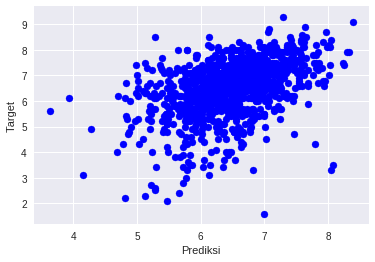

In [41]:
plt.scatter(y_test_predict, y_test, color='blue')
plt.xlabel("Prediksi")
plt.ylabel("Target")
plt.show()